In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pykrx import stock

In [143]:
bond_df = pd.read_csv('otc_bond.csv', index_col=0, parse_dates=True)
irs_swap_df = pd.read_csv('IRS_swap_rate.csv', index_col=0, parse_dates=True)

In [4]:
#irs_swap_df['spread'] = irs_swap_df.IRS1Y - irs_swap_df.IRS5Y

In [33]:
test = irs_swap_df.dropna()
test30 = test.rolling(30).mean().dropna()
test252 = test.rolling(252).mean().dropna()

In [42]:
#import numpy as np
from scipy.spatial import Delaunay

def calculate_concavity(points):
    # 좌표 배열 생성
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    # Delaunay 삼각화 객체 생성
    tri = Delaunay(points)
    
    # 삼각화된 영역의 오목성 계산
    concavity = 0
    for triangle in tri.simplices:
        # 삼각형의 꼭지점 좌표 가져오기
        p1, p2, p3 = points[triangle]
        
        # 삼각형의 면적 계산
        area = 0.5 * abs((p1[0] * (p2[1] - p3[1])) + (p2[0] * (p3[1] - p1[1])) + (p3[0] * (p1[1] - p2[1])))
        
        # 삼각형의 높이 계산
        max_height = max(abs(p2[1] - p3[1]), abs(p3[1] - p1[1]), abs(p1[1] - p2[1]))
        
        # 삼각형의 오목함 계산
        triangle_concavity = area / max_height
        
        # 최대 오목함 갱신
        concavity = max(concavity, triangle_concavity)
    
    return concavity

# 좌표 배열 (x, y)
#points = np.array([[1, 2], [2, 5], [3, 3], [4, 6], [5, 1]])

# concavity 계산
result = calculate_concavity(points)
print("Concavity:", result)


Concavity: 1.5


In [73]:
from scipy.interpolate import splprep, splev

def calculate_curvature(points):
    # 좌표 배열 생성
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    # 곡선을 위한 스플라인 보간
    tck, u = splprep([x, y], s=0)
    
    # 곡률 계산
    curvature = 0
    for i in range(len(points)):
        u_i = u[i]
        
        # 점의 도함수 계산
        x_prime, y_prime = splev(u_i, tck, der=1)
        x_double_prime, y_double_prime = splev(u_i, tck, der=2)
        
        # 곡률 계산
        k = abs(x_prime * y_double_prime - y_prime * x_double_prime) / (x_prime ** 2 + y_prime ** 2) ** (3/2)
        
        # 최대 곡률 갱신
        curvature = max(curvature, k)
    
    return curvature


In [47]:
np.arange(1,7,1)

array([1, 2, 3, 4, 5, 6])

In [63]:
points_short = np.vstack([np.arange(1,7,1), test30.loc['2020-05-06'].values]).T
points_long = np.vstack([np.arange(1,7,1), test252.loc['2020-05-06'].values]).T

calculate_concavity(points_short), calculate_concavity(points_long)

(0.44452773613193425, 1.4996440093447558)

In [74]:
calculate_curvature(points_short), calculate_curvature(points_long)

(0.1763336855567105, 0.09527326361691922)

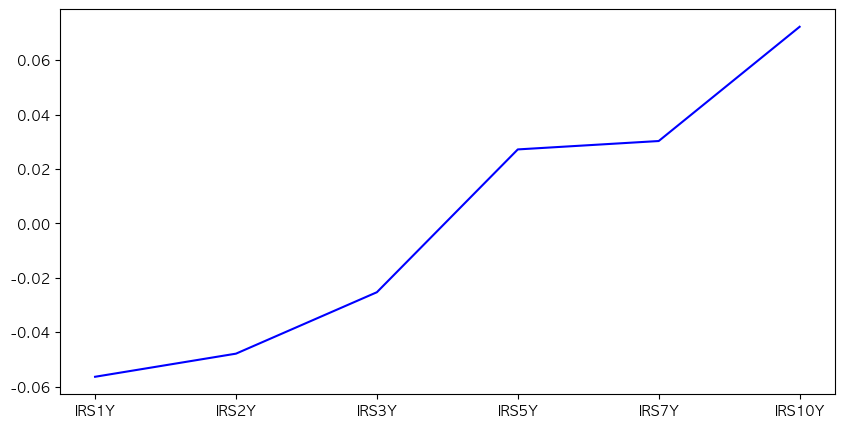

In [75]:
plt.figure(figsize=(10,5))
plt.plot(test30.loc['2020-05-06'] - test30.loc['2020-05-06'].mean(), color='b')
#plt.plot(test252.loc['2020-05-06'], color='k')

# IRS 금리 커브대로, 향후 Bond수익률이 따라가는가?

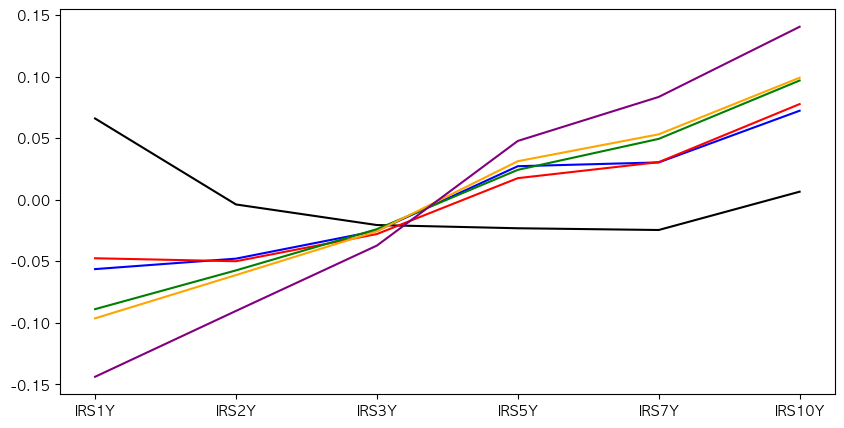

In [113]:
plt.figure(figsize=(10,5))
plt.plot(test252.loc['2020-05-06'] - test252.loc['2020-05-06'].mean(), color='k')
plt.plot(test30.loc['2020-05-06'] - test30.loc['2020-05-06'].mean(), color='b')
plt.plot(test30.loc['2020-06-08'] - test30.loc['2020-06-08'].mean(), color='r')
plt.plot(test30.loc['2020-07-08'] - test30.loc['2020-07-08'].mean(), color='g')
plt.plot(test30.loc['2020-08-10'] - test30.loc['2020-08-10'].mean(), color='orange')
plt.plot(test30.loc['2020-09-10'] - test30.loc['2020-09-10'].mean(), color='purple')

In [189]:
import statsmodels.api as sm

In [237]:
irs1m

,IRS1Y,IRS2Y,IRS3Y,IRS5Y,IRS7Y,IRS10Y,spread
Date,,,,,,,
2000-03-07,8.300000,8.875000,9.125000,9.600000,9.700000,9.850000,1.300000
2000-03-21,8.283333,8.955000,9.250000,9.658333,9.700000,9.800000,1.375000
2000-04-04,8.081667,8.825000,9.086667,9.466667,9.600000,9.658333,1.385000
2000-04-18,7.937500,8.737500,8.950000,9.325000,9.437500,9.562500,1.387500
2000-05-02,7.918750,8.672500,8.887500,9.331250,9.462500,9.537500,1.412500
...,...,...,...,...,...,...,...
2023-04-04,3.536750,3.320750,3.201500,3.096000,3.067000,3.056500,-0.440750
2023-04-18,3.472750,3.275500,3.166500,3.082300,3.061250,3.051000,-0.390450
2023-05-02,3.547833,3.347278,3.217500,3.133667,3.114444,3.114778,-0.414167


In [239]:
bond1m

,CD(91일),국고채 10년,국고채 1년,국고채 20년,국고채 2년,국고채 30년,국고채 3년,국고채 5년,국민주택 1종 5년,회사채 AA-(무보증 3년),회사채 BBB- (무보증 3년)
2002-01-08,4.878000,7.094000,5.404000,0.000000,NaN,0.000000,6.170000,6.912000,7.042000,7.192000,11.356000
2002-01-22,4.806000,7.068000,5.220000,0.000000,NaN,0.000000,6.028000,6.830000,6.950000,7.039000,11.196000
2002-02-05,4.678000,7.128000,5.080000,0.000000,NaN,0.000000,6.058000,6.802000,6.945000,7.004000,11.151000
2002-02-19,4.544286,7.027143,4.985714,0.000000,NaN,0.000000,5.942857,6.682857,6.887143,6.924286,11.077143
2002-03-05,4.472222,6.920000,4.933333,0.000000,NaN,0.000000,5.883333,6.637778,6.834444,6.845556,11.014444
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-04,3.596000,3.293200,3.286400,3.302100,3.329700,3.282200,3.250800,3.245900,3.407700,4.028600,10.419800
2023-04-18,3.485000,3.290600,3.260000,3.273200,3.294600,3.261500,3.236600,3.217600,3.370800,4.045400,10.434500
2023-05-02,3.495556,3.348222,3.245667,3.349111,3.350222,3.337778,3.289778,3.291889,3.437000,4.101111,10.484222
2023-05-16,3.582222,3.308000,3.353000,3.353222,3.352778,3.357222,3.249667,3.230667,3.422444,4.063333,10.444778


In [240]:
bond1m = bond_df.resample('2W-TUE').mean()
irs1m = irs_swap_df.dropna().resample('2W-TUE').mean()
irs1m['spread'] = irs1m.IRS5Y - irs1m.IRS1Y

olst = pd.concat([bond1m['국고채 1년'], irs1m[['IRS1Y', 'spread']]], axis=1).dropna()

X = olst[['IRS1Y', 'spread']].shift(1)[1:250]
y = olst['국고채 1년'][1:250]

X = sm.add_constant(X)
reg = sm.OLS(y,X).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 국고채 1년   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2020.
Date:                Mon, 22 May 2023   Prob (F-statistic):          2.15e-153
Time:                        15:54:53   Log-Likelihood:                 29.840
No. Observations:                 249   AIC:                            -53.68
Df Residuals:                     246   BIC:                            -43.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0651      0.081     -0.805      0.421      -0.224       0.094
IRS1Y          1.0094      0.017     58.695      0.000       0.976       1.043
spread         0.0155      0.030      0.517      0.605      -0.044       0.075
==============================================================================
Omnibus:                       21.765   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.879
Skew:                          -0.716   Prob(JB):                     3.96e-06
Kurtosis:                       3.588   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
import yfinance as yf

In [244]:
aa = yf.Ticker('AAPL')

In [245]:
aa.balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [247]:
aa.get_info()

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

In [250]:
aa.get_shares

<bound method TickerBase.get_shares of yfinance.Ticker object <AAPL>>

In [256]:
import yahoo_fin.stock_info as si

In [263]:
si.get_market_status

TypeError: get_market_status() takes 0 positional arguments but 1 was given

In [261]:
si.get_holders('AAPL')

{'Major Holders':         0                                      1
 0   0.07%        % of Shares Held by All Insider
 1  61.23%       % of Shares Held by Institutions
 2  61.27%        % of Float Held by Institutions
 3    5743  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                               Holder      Shares Date Reported  % Out  \
 0         Vanguard Group, Inc. (The)  1309785362  Mar 30, 2023  8.33%   
 1                     Blackrock Inc.  1035008939  Mar 30, 2023  6.58%   
 2            Berkshire Hathaway, Inc   915560382  Mar 30, 2023  5.82%   
 3           State Street Corporation   576281774  Mar 30, 2023  3.66%   
 4                           FMR, LLC   311437576  Mar 30, 2023  1.98%   
 5      Geode Capital Management, LLC   285171112  Mar 30, 2023  1.81%   
 6      Price (T.Rowe) Associates Inc   234017381  Mar 30, 2023  1.49%   
 7                     Morgan Stanley   200615893  Mar 30, 2023  1.28%   
 8         Northern Trust Corpor

In [266]:
import yahoo_fin.stock_info as si
si.get_quote_table('AAPL')

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/yahoo_fin/stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/yahoo_fin/stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


{'1y Target Est': 178.88,
 '52 Week Range': '124.17 - 176.39',
 'Ask': '173.89 x 1200',
 'Avg. Volume': 58337645.0,
 'Beta (5Y Monthly)': 1.3,
 'Bid': '173.82 x 900',
 "Day's Range": '173.45 - 174.71',
 'EPS (TTM)': 5.9,
 'Earnings Date': 'Jul 26, 2023 - Jul 31, 2023',
 'Ex-Dividend Date': 'May 12, 2023',
 'Forward Dividend & Yield': '0.96 (0.55%)',
 'Market Cap': '2.735T',
 'Open': 173.98,
 'PE Ratio (TTM)': 29.47,
 'Previous Close': 175.16,
 'Quote Price': 173.86749267578125,
 'Volume': 15667499.0}

In [259]:
import yahoo_fin.stock_info as si
si.get_data('AAPL')

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600,AAPL
...,...,...,...,...,...,...,...
2023-05-16,171.990005,173.139999,171.800003,172.070007,172.070007,42110300,AAPL
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600,AAPL
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700,AAPL
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400,AAPL


In [264]:
si.get_company_info('AAPL')

TypeError: string indices must be integers

In [254]:
aa._get_fundamentals('Market Cap')

In [251]:
aa.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-24,164.772093,165.371270,163.663625,165.101639,41949600,0.00,0
2023-04-25,164.961829,166.080278,163.503839,163.543793,48714100,0.00,0
2023-04-26,162.834768,165.051703,162.575133,163.533798,45498800,0.00,0
2023-04-27,164.961830,168.327170,164.961830,168.177383,64902300,0.00,0
2023-04-28,168.257274,169.615396,167.648116,169.445618,55209200,0.00,0
2023-05-01,169.046174,170.214556,168.407059,169.355743,52472900,0.00,0
2023-05-02,169.855052,170.114703,167.308571,168.307190,48425700,0.00,0
2023-05-03,169.265876,170.683912,166.929111,167.218704,65136000,0.00,0
2023-05-04,164.662239,166.809263,164.083038,165.560989,81235400,0.00,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 국고채 1년   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3728.
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.06e-184
Time:                        15:48:00   Log-Likelihood:                 217.68
No. Observations:                 249   AIC:                            -429.4
Df Residuals:                     246   BIC:                            -418.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3812      0.049      7.793      0.000       0.285       0.477
IRS1Y          0.9547      0.012     76.752      0.000       0.930       0.979
spread        -0.1340      0.019     -7.218      0.000      -0.171      -0.097
==============================================================================
Omnibus:                       15.448   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.348
Skew:                           0.403   Prob(JB):                     8.51e-06
Kurtosis:                       4.265   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

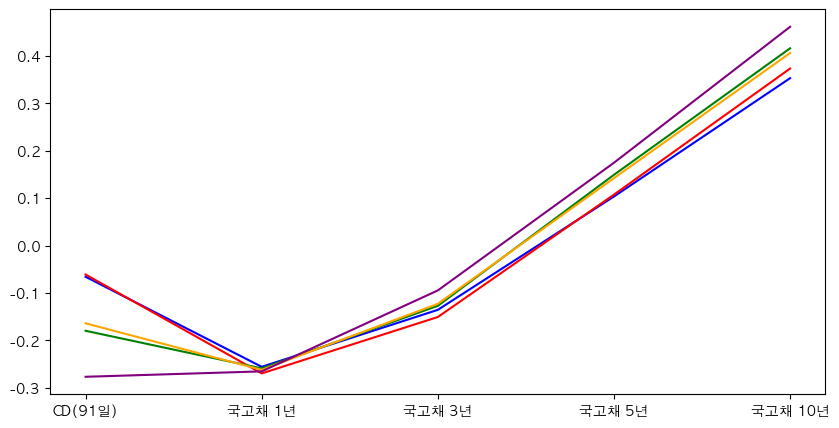

In [134]:
plt.figure(figsize=(10,5))
#plt.plot(test252.loc['2020-05-06'] - test252.loc['2020-05-06'].mean(), color='k')
plt.plot(test2_30.loc['2020-05-08'] - test2_30.loc['2020-05-08'].mean(), color='b')
plt.plot(test2_30.loc['2020-06-08'] - test2_30.loc['2020-06-08'].mean(), color='r')
plt.plot(test2_30.loc['2020-07-08'] - test2_30.loc['2020-07-08'].mean(), color='g')
plt.plot(test2_30.loc['2020-08-10'] - test2_30.loc['2020-08-10'].mean(), color='orange')
plt.plot(test2_30.loc['2020-09-10'] - test2_30.loc['2020-09-10'].mean(), color='purple')

In [131]:
test2_30 = bond_df[['CD(91일)','국고채 1년', '국고채 3년', '국고채 5년', '국고채 10년']].rolling(30).mean().dropna()

In [133]:
test2_30

,CD(91일),국고채 1년,국고채 3년,국고채 5년,국고채 10년
2002-02-15,4.734333,5.165333,6.046333,6.807667,7.086000
2002-02-18,4.722333,5.149000,6.040333,6.799667,7.083000
2002-02-19,4.709667,5.133000,6.033000,6.791667,7.079000
2002-02-20,4.697000,5.119667,6.026000,6.785000,7.076000
2002-02-21,4.684000,5.106333,6.018667,6.779333,7.073000
...,...,...,...,...,...
2023-05-15,3.523333,3.281967,3.262333,3.250967,3.318467
2023-05-16,3.524333,3.285900,3.261400,3.249000,3.317233
2023-05-17,3.526333,3.289500,3.259133,3.245667,3.314900
2023-05-18,3.528667,3.294333,3.260367,3.247000,3.316600


In [123]:
test2_30

,국고채 1년,국고채 2년,국고채 3년,국고채 5년
2021-04-20,0.678033,0.927900,1.152067,1.576000
2021-04-21,0.676467,0.924300,1.149667,1.575600
2021-04-22,0.675033,0.921633,1.147200,1.576233
2021-04-23,0.673567,0.919000,1.143767,1.575467
2021-04-26,0.671933,0.916567,1.139800,1.574833
...,...,...,...,...
2023-05-15,3.281967,3.333400,3.262333,3.250967
2023-05-16,3.285900,3.333567,3.261400,3.249000
2023-05-17,3.289500,3.332800,3.259133,3.245667
2023-05-18,3.294333,3.335367,3.260367,3.247000


In [84]:
tickers = stock.get_etf_ticker_list("20200506")

aa = []
for ticker in tickers:
    aa.append(stock.get_etf_ticker_name(ticker))

In [101]:
sb = stock.get_etf_ohlcv_by_date("20200506", "20221006", '153130')
sb

,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수
날짜,,,,,,,,
2020-05-06,102237.34,102235,102240,102230,102240,18326,1873578285,152.52
2020-05-07,102246.64,102240,102245,102240,102240,9512,972525340,152.53
2020-05-08,102255.39,102250,102255,102245,102250,22210,2270973745,152.54
2020-05-11,102258.85,102255,102265,102255,102260,11699,1196339445,152.55
2020-05-12,102267.17,102260,102265,102260,102265,9562,977852250,152.56
...,...,...,...,...,...,...,...,...
2022-09-29,103681.05,103630,103720,103630,103695,692144,71755089175,155.26
2022-09-30,103743.27,103705,103745,103705,103735,1629842,169062334500,155.36
2022-10-04,103774.64,103735,103775,103735,103750,2023081,209924933485,155.38


<AxesSubplot:xlabel='날짜'>

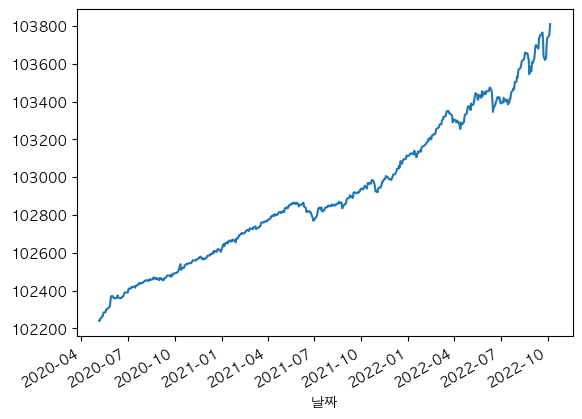

In [102]:
sb['종가'].plot()

In [92]:
pd.DataFrame(data=[tickers, aa]).T

,0,1
0,292340,마이티 200커버드콜ATM레버리지
1,159800,마이티 코스피100
2,285000,KBSTAR 200IT
3,287300,KBSTAR 200건설
4,287310,KBSTAR 200경기소비재
...,...,...
388,213630,ARIRANG 미국다우존스고배당주(합성 H)
389,189400,ARIRANG 글로벌MSCI(합성 H)
390,195970,ARIRANG 선진국MSCI(합성 H)
391,195980,ARIRANG 신흥국MSCI(합성 H)


In [6]:
bond

<AxesSubplot:xlabel='Date'>

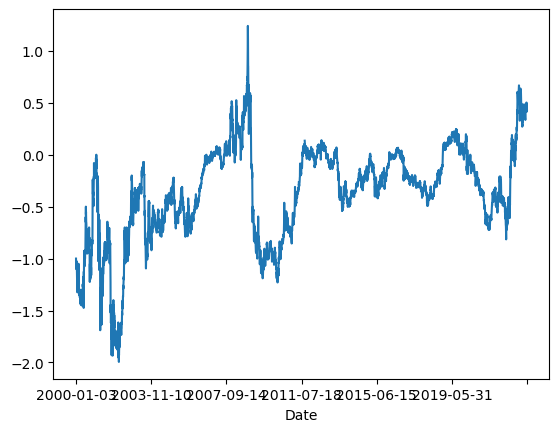

In [5]:
irs_swap_df.spread.plot()